<a href="https://colab.research.google.com/github/Ravikumarredd/USA-airlines-delay-cause/blob/main/USA_AIRLINE_DELAY_CAUSE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Loading Dataset

In [ ]:
df = pd.read_csv("D:/Airline_Delay_Cause.csv")

In [ ]:
df.shape

(318017, 21)

In [ ]:
df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2022,5,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",136.0,7.0,5.95,0.00,...,0.0,1.00,0.0,0.0,255.0,222.0,0.0,4.0,0.0,29.0
1,2022,5,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",91.0,16.0,7.38,0.00,...,0.0,6.09,0.0,0.0,884.0,351.0,0.0,81.0,0.0,452.0
2,2022,5,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",19.0,2.0,0.13,0.00,...,0.0,0.88,1.0,0.0,138.0,4.0,0.0,106.0,0.0,28.0
3,2022,5,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",88.0,14.0,7.26,0.76,...,0.0,1.64,0.0,0.0,947.0,585.0,35.0,125.0,0.0,202.0
4,2022,5,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",181.0,19.0,13.84,0.00,...,0.0,2.09,0.0,0.0,808.0,662.0,0.0,87.0,0.0,59.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318017 entries, 0 to 318016
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 318017 non-null  int64  
 1   month                318017 non-null  int64  
 2   carrier              318017 non-null  object 
 3   carrier_name         318017 non-null  object 
 4   airport              318017 non-null  object 
 5   airport_name         318017 non-null  object 
 6   arr_flights          317529 non-null  float64
 7   arr_del15            317289 non-null  float64
 8   carrier_ct           317529 non-null  float64
 9   weather_ct           317529 non-null  float64
 10  nas_ct               317529 non-null  float64
 11  security_ct          317529 non-null  float64
 12  late_aircraft_ct     317529 non-null  float64
 13  arr_cancelled        317529 non-null  float64
 14  arr_diverted         317529 non-null  float64
 15  arr_delay        

In [ ]:
df.describe()

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
count,318017.000000,318017.000000,317529.000000,317289.000000,317529.000000,317529.000000,317529.000000,317529.000000,317529.000000,317529.000000,317529.000000,317529.000000,317529.000000,317529.000000,317529.000000,317529.000000,317529.000000
mean,2012.450957,6.497844,381.763984,72.904403,21.072980,2.616379,24.005228,0.179037,24.975734,7.207257,0.867672,4209.947536,1286.583503,220.567542,1099.516422,7.214799,1596.062993
std,5.678296,3.459423,1027.148994,198.935595,47.671306,9.968549,85.113757,0.844834,75.275223,37.216301,3.915760,12518.907854,3515.397263,861.521440,4636.475908,38.854566,4924.950687
min,2003.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-19.000000,0.000000,0.000000
25%,2007.000000,3.000000,59.000000,9.000000,3.000000,0.000000,1.680000,0.000000,1.640000,0.000000,0.000000,436.000000,148.000000,0.000000,56.000000,0.000000,79.000000
50%,2012.000000,6.000000,120.000000,23.000000,8.190000,0.580000,5.490000,0.000000,5.860000,1.000000,0.000000,1201.000000,437.000000,25.000000,203.000000,0.000000,351.000000
75%,2018.000000,10.000000,273.000000,56.000000,19.690000,2.000000,15.350000,0.000000,17.040000,4.000000,1.000000,3080.000000,1100.000000,159.000000,602.000000,0.000000,1110.000000
max,2022.000000,12.000000,21977.000000,6377.000000,1792.070000,717.940000,4091.270000,80.560000,1885.470000,4951.000000,256.000000,433687.000000,196944.000000,57707.000000,238440.000000,3760.000000,148181.000000


In [ ]:
# CHECK WHAT COLUMNS ARE THERE IN THE DATASET
df.columns

Index(['year', 'month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay'],
      dtype='object')

# Data Cleaning 

In [ ]:
df.isnull().sum()

year                     0
month                    0
carrier                  0
carrier_name             0
airport                  0
airport_name             0
arr_flights            488
arr_del15              728
carrier_ct             488
weather_ct             488
nas_ct                 488
security_ct            488
late_aircraft_ct       488
arr_cancelled          488
arr_diverted           488
arr_delay              488
carrier_delay          488
weather_delay          488
nas_delay              488
security_delay         488
late_aircraft_delay    488
dtype: int64

- The dataset  has null values before handling null values . Let's us check percentage of null values  

In [ ]:
df.isnull().sum()/df.shape[0]*100

year                   0.000000
month                  0.000000
carrier                0.000000
carrier_name           0.000000
airport                0.000000
airport_name           0.000000
arr_flights            0.153451
arr_del15              0.228919
carrier_ct             0.153451
weather_ct             0.153451
nas_ct                 0.153451
security_ct            0.153451
late_aircraft_ct       0.153451
arr_cancelled          0.153451
arr_diverted           0.153451
arr_delay              0.153451
carrier_delay          0.153451
weather_delay          0.153451
nas_delay              0.153451
security_delay         0.153451
late_aircraft_delay    0.153451
dtype: float64

- Here we can see that columns which are having null values , their null value percentage is below one percentage so we can remove it

## Dropping null values :

In [ ]:
df_new= df.dropna()

- dropping null values and resulting dataframe storing as df_new

In [ ]:
df_new.isnull().sum()

year                   0
month                  0
carrier                0
carrier_name           0
airport                0
airport_name           0
arr_flights            0
arr_del15              0
carrier_ct             0
weather_ct             0
nas_ct                 0
security_ct            0
late_aircraft_ct       0
arr_cancelled          0
arr_diverted           0
arr_delay              0
carrier_delay          0
weather_delay          0
nas_delay              0
security_delay         0
late_aircraft_delay    0
dtype: int64

- We can see that after dropping null values , all null values are dropped.

## correlation matrix:

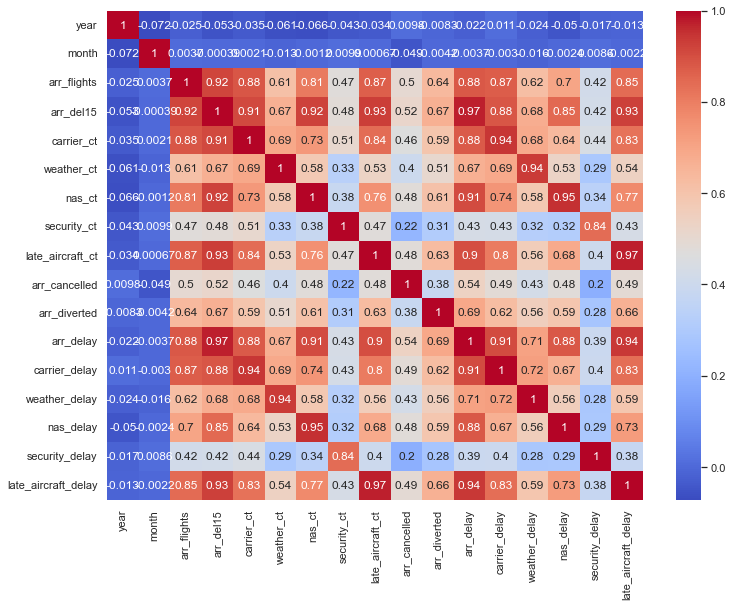

In [ ]:
plt.figure(figsize = (12,9))
sns.heatmap(df_new.corr(), annot = True, cmap = "coolwarm")
plt.show()

### Through the correlation matrix we can see how some of the 20 variables in the dataset present multicollinearity, in other words, can be linearly predicted from the others. In order to have a better analysis and work with a lighter dataset, we are going to delete some of those unwanted variables and create new ones. We can also make the following observations:

 - ### Only when Arrival Delay is longer than 15 minutes there's data about what caused the delay. Arrival Delay is the sum of CarrierDelay, WeatherDelay, NASDelay and LateAircraftDelay. In cases of cancelation or diversion there's no data related to delay causes.

## Statistical information about the dataset

In [ ]:
df_new.describe()

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
count,317289.000000,317289.000000,317289.000000,317289.000000,317289.000000,317289.000000,317289.000000,317289.000000,317289.000000,317289.000000,317289.000000,317289.000000,317289.000000,317289.000000,317289.000000,317289.000000,317289.000000
mean,2012.446356,6.498315,382.046226,72.904403,21.088920,2.618358,24.023386,0.179172,24.994626,7.206317,0.868193,4213.131974,1287.556685,220.734381,1100.348105,7.220257,1597.270268
std,5.677271,3.459955,1027.486006,198.935595,47.685808,9.972059,85.143379,0.845139,75.300552,37.227520,3.917172,12523.106018,3516.548396,861.825845,4638.130463,38.868752,4926.617274
min,2003.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-19.000000,0.000000,0.000000
25%,2007.000000,3.000000,59.000000,9.000000,3.010000,0.000000,1.690000,0.000000,1.650000,0.000000,0.000000,437.000000,149.000000,0.000000,56.000000,0.000000,79.000000
50%,2012.000000,6.000000,120.000000,23.000000,8.210000,0.580000,5.500000,0.000000,5.870000,1.000000,0.000000,1203.000000,437.000000,25.000000,203.000000,0.000000,352.000000
75%,2018.000000,10.000000,274.000000,56.000000,19.710000,2.000000,15.370000,0.000000,17.050000,4.000000,1.000000,3083.000000,1101.000000,159.000000,602.000000,0.000000,1111.000000
max,2022.000000,12.000000,21977.000000,6377.000000,1792.070000,717.940000,4091.270000,80.560000,1885.470000,4951.000000,256.000000,433687.000000,196944.000000,57707.000000,238440.000000,3760.000000,148181.000000


- Min and Max value gives the min and max time delay for each cause and mean value gives the average time for each cause.

# Univariate Analysis

# which year have more delays and least delays ?

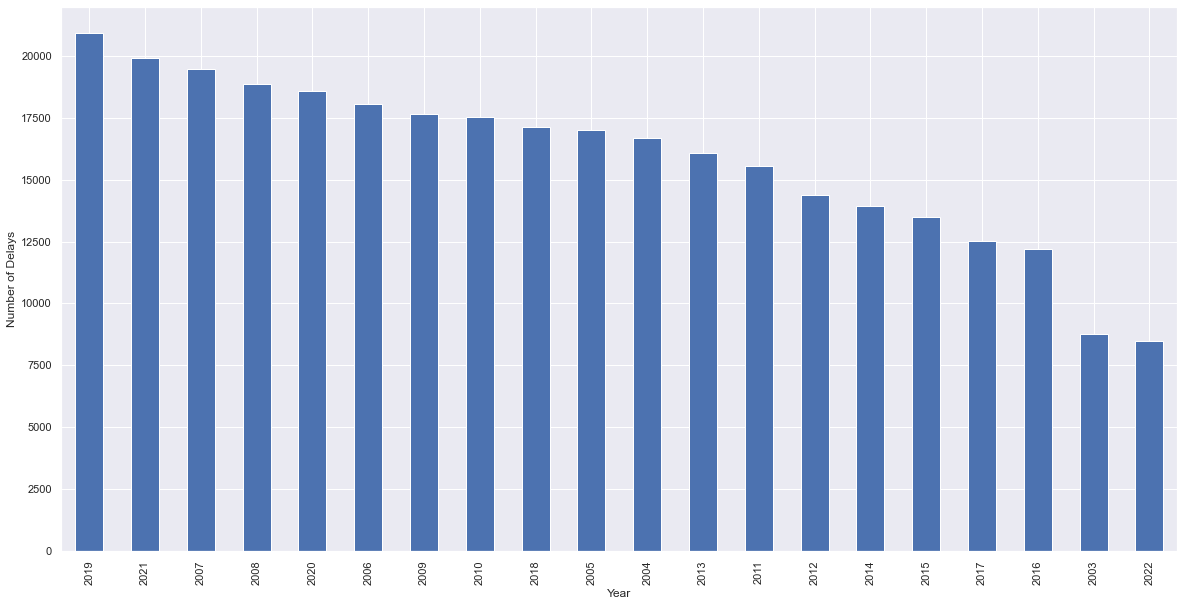

In [ ]:
df_new['year'].value_counts().plot(kind = 'bar',figsize=(20,10))
plt.xlabel("Year")
plt.ylabel("Number of Delays")
plt.show()

- 2019 have more number of delays 
- 2022 have less number of delays

## which year has the most variety in the carriers and Airports ?

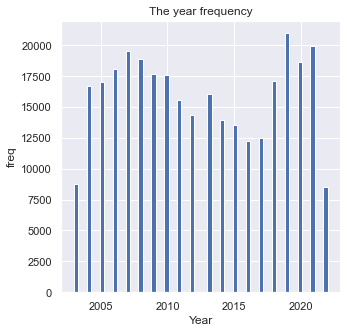

In [ ]:
sns.set(rc={'figure.figsize':(5,5)});
plt.hist(data=df_new,x='year',bins='fd');
plt.xlabel('Year')
plt.ylabel('freq');
plt.title('The year frequency');

- That suggest that in rounded 2018 and 2019 it's the biggest era that has the most variety in the carriers and Airports
- Airline industry started to have more airline carries rounded to 2017

## which months have the most year flights ?

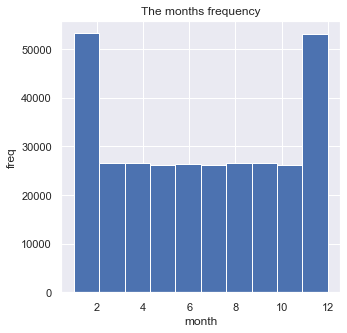

In [ ]:
plt.hist(data=df_new,x='month');
plt.xlabel('month')
plt.ylabel('freq');
plt.title('The months frequency');

- The 1st and the 12th month has the most flights number get the frequency of the airports

## Which carrier has the most Spread and existence ?

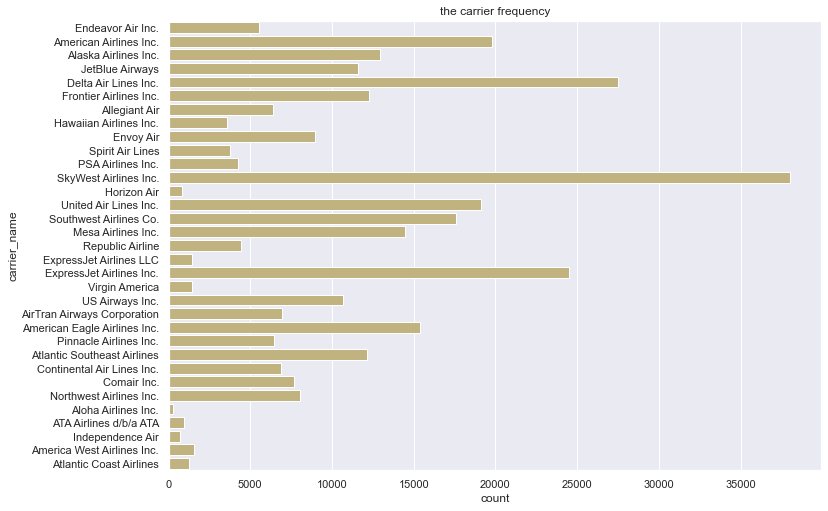

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)});
color=sns.color_palette()[8]
sns.countplot(data=df_new,y='carrier_name',color=color);
plt.title('the carrier frequency');

- As we see that SkyWest Airlines Inc has more spread and existence

# Bivariate Analysis

## what are the Most crowded airports in the past 16 years

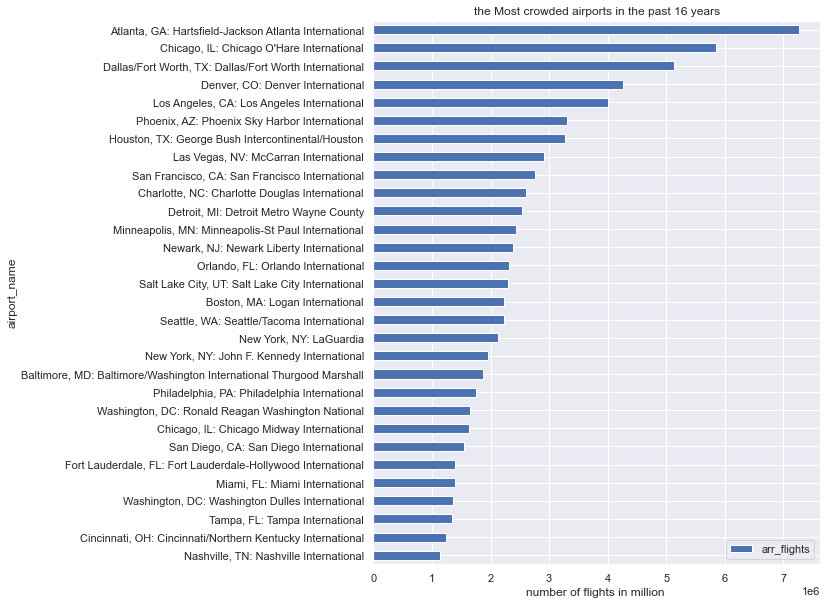

In [ ]:
df_new.groupby("airport_name").sum()[['arr_flights']].sort_values(by="arr_flights").tail(30).plot(kind='barh',figsize=(8,10),grid=True)
plt.title('the Most crowded airports in the past 16 years')
plt.xlabel('number of flights in million ');

- Atlanta, GA is the most crowded airport over the past 16 years then Chicago II then Dallas/Fort Worth.

## what are the biggest carrieres in the past 16 years ?

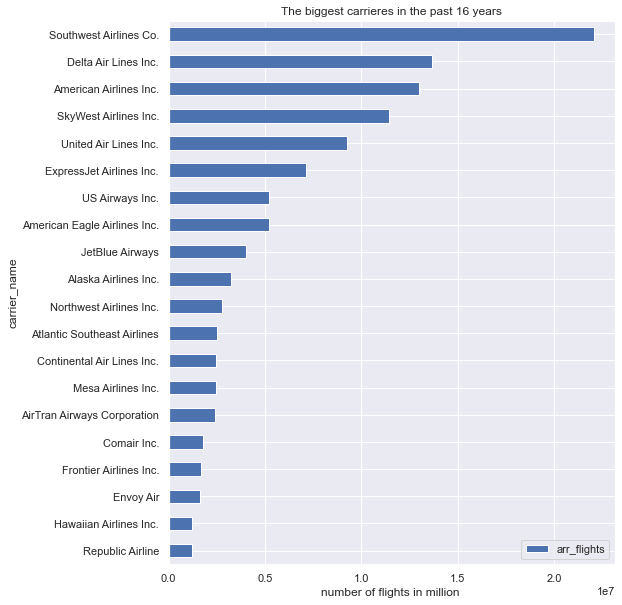

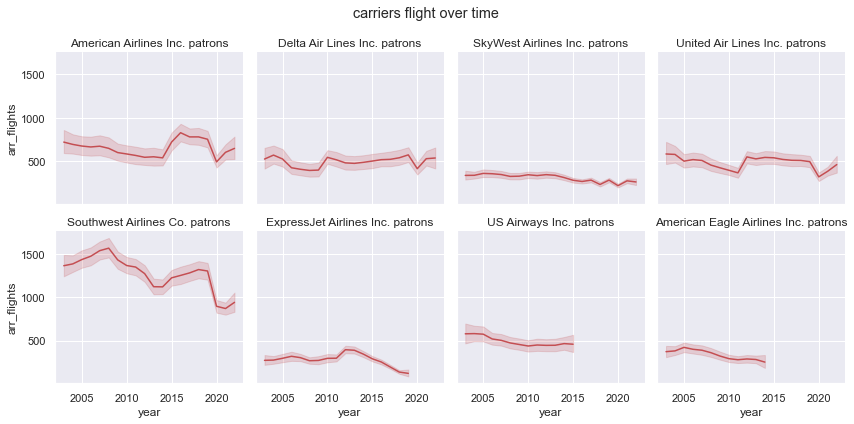

In [ ]:
df_new.groupby('carrier_name').sum()[['arr_flights']].sort_values(by="arr_flights").tail(20).plot(kind='barh',figsize=(8,10),grid=True)
plt.title('The biggest carrieres in the past 16 years')
plt.xlabel('number of flights in million ');

big_carrier=df_new.query("carrier_name =='Southwest Airlines Co.' or carrier_name =='Delta Air Lines Inc.' or carrier_name =='American Airlines Inc.'or carrier_name =='SkyWest Airlines Inc.'or carrier_name =='United Air Lines Inc.'or carrier_name =='ExpressJet Airlines Inc.'or carrier_name =='US Airways Inc.'or carrier_name =='American Eagle Airlines Inc.'")


g = sns.FacetGrid(big_carrier, col="carrier_name",col_wrap=4)
g.fig.suptitle('carriers flight over time');
g.map_dataframe(sns.lineplot,"year","arr_flights", data=big_carrier,color='r');
g.set_titles(col_template="{col_name} patrons", row_template="{row_name}");

## The biggest carrieres in the past 16 years
- The southwest airline has the biggest number of flight then delta airline , and the 3rd is american arline.

##  Carriers flight in million
- delta air lines : non-significant
- American Eagle : non-significant
- united airline : a little increasing near to 2010
- us airways : non-significant
- southwest airline : there is a decreasing stated in near to 2008 and continued to decrease
- expressjet airlines INC : there was a small quit decreasing since the 2012
- american airlines INC: there was a start in increasing since the near to 2015
note : all the flight numbers had a big decreased regardless to Corona-virus which started in the late of 2019

## what are the biggest carriers in delaying ?

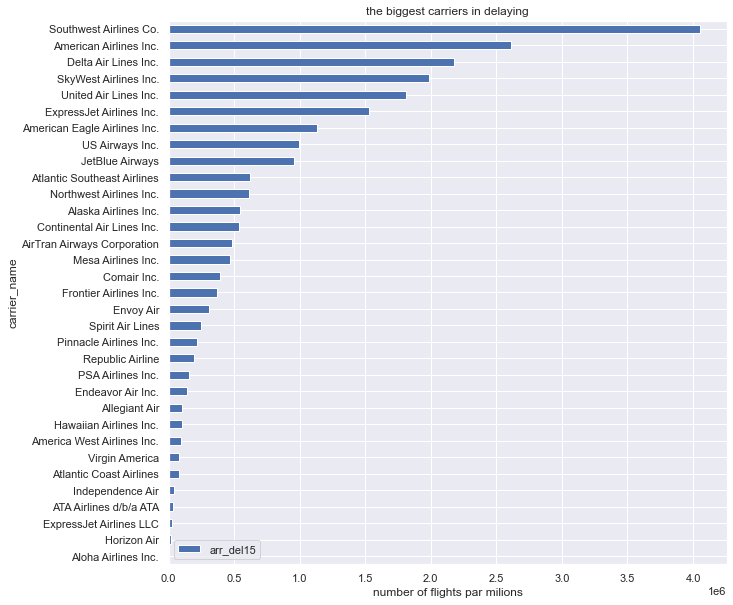

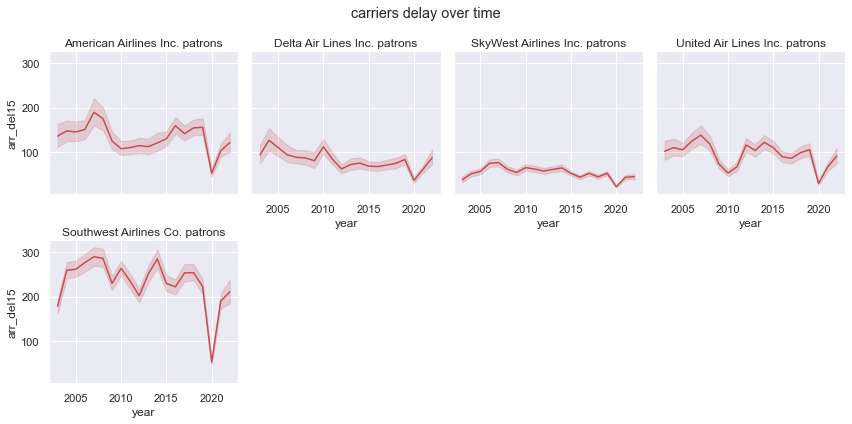

In [ ]:
df_new.groupby("carrier_name").sum()[['arr_del15']].sort_values(by="arr_del15").plot(kind='barh',figsize=(10,10),grid=True);
plt.title('The biggest carriers in delaying');
plt.xlabel('number of flights par milions');


delay_compeny=df_new.query("carrier_name == 'Southwest Airlines Co.' or carrier_name == 'American Airlines Inc.'or carrier_name == 'Delta Air Lines Inc.'or carrier_name == 'SkyWest Airlines Inc.'or carrier_name == 'United Air Lines Inc.' ")


g = sns.FacetGrid(delay_compeny, col="carrier_name",col_wrap=4)
g.fig.suptitle('carriers delay over time');
g.map_dataframe(sns.lineplot,"year","arr_del15", data=delay_compeny,color='r');
g.set_titles(col_template="{col_name} patrons", row_template="{row_name}");

## The biggest carriers in delaying
- The southwest airline has the biggest number of delaying then american airline , and the 3rd is delta airline.

## Carriers delay over time
- delta air lines INC : started to decreace in delaying near 2004 except in the 2010 but it countined to decreasing
- united air lines INC : started to decrece in near 2008 but it had backed in delaying after that .
- southwest aitlin CO : has unstable pattern
- american airlines INC : started to decrace in near 2008 .<br>
<b>Note : all the flight numbers had a big decreased regardless to Corona

## what is the chaning over time in flights ?

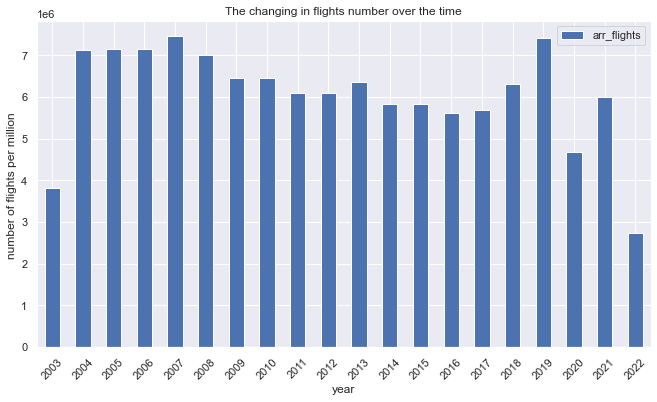

In [ ]:
df_new.groupby('year').sum()[['arr_flights']].plot.bar(figsize=(11,6),grid=True)
plt.xticks(rotation = 45);
plt.title('The changing in flights number over the time');
plt.ylabel('number of flights per million ');

- There is a decrease in the flight numbers since the start of 2007 till the 2017

## what is the chaning over time in cancelled flights ?

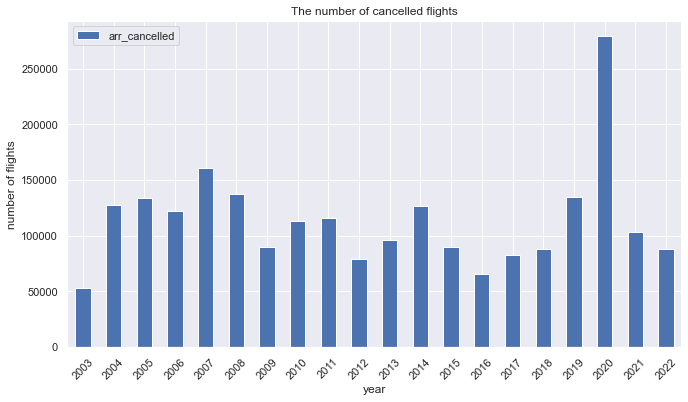

In [ ]:
df_new.groupby('year').sum()[['arr_cancelled']].plot.bar(figsize=(11,6),grid=True)
plt.xticks(rotation = 45);
plt.title('The number of cancelled flights');
plt.ylabel('number of flights');

- 2007 has a big increase in cancelling flights there an article from CNN was talkin about that case , and there is also the 2020 big increasing in cancellion despite the Coronavirus.

## what does effect the delay ?

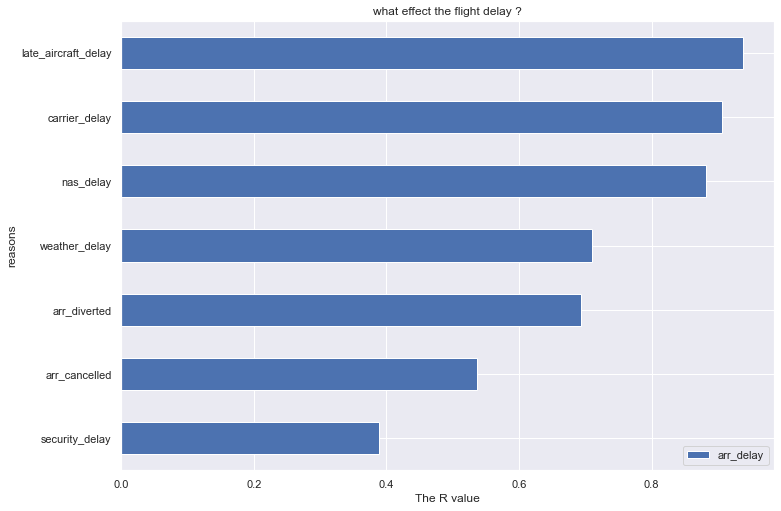

In [ ]:
corr_data=df_new.corr()[['arr_delay']].reset_index().sort_values(by='arr_delay').drop([0, 1,2,3,4,5,6,7,8,11]).reset_index(drop=True)

corr_data.plot(kind="barh",x='index',y='arr_delay',grid=True);

plt.title('what effect the flight delay ?');

plt.ylabel('reasons');

plt.xlabel('The R value');


- The late aircraft is the most effective reasons in the flight delays

# Multivariate Analysis

# How is changing in flights number due year and months ?¶

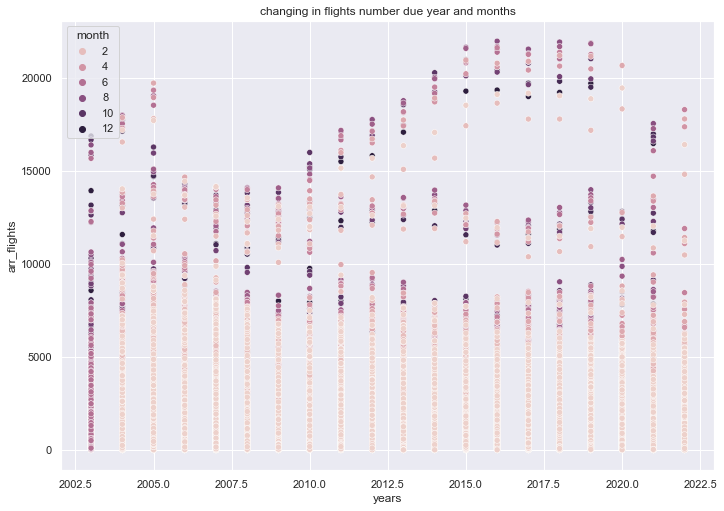

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)});
sns.scatterplot(data=df_new,x='year',y='arr_flights',hue='month');
plt.xlabel('years')
plt.title('changing in flights number due year and months');

- There was decreasing in the flights number started from 2006 till 2009 ,after that it continued to increase
- In the 2020 there was a small amount of flights number ,and most of the flights happended in the late of the year
- The dark scatter color suggest that the most flights happens in the late late months of the year

## what is the relation between different times type delays ?

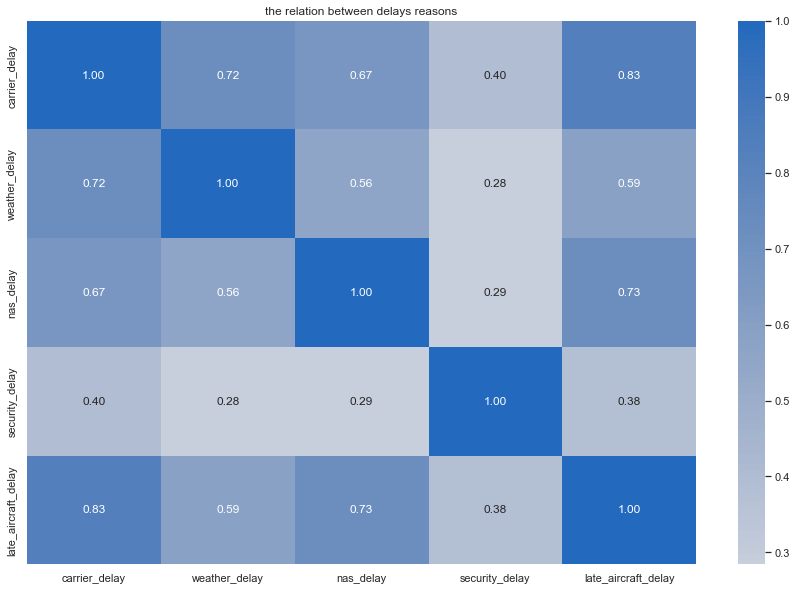

In [ ]:
sns.set(rc={'figure.figsize':(15,10)});
temp=df_new.drop(['year', 'month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted','arr_delay'],axis=1)
sns.heatmap(temp.corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0);
plt.title('the relation between delays reasons');

- we can find that the carrier delay has relation with the late aircraft delay

- And nas delay with the carrier delay

- And the weather delay with the carrier delay


# conclusions
- In rounded 2018 and 2019 it was the biggest era that has the most variety in the carriers and Airports "airline industry started to have more airline carries rounded to 2017"
- Atlanta, GA is the most crowded airport over the past 16 years then Chicago II then Dallas/Fort Worth.
- The southwest airline has the biggest number of flight number then delta airline , and the 3rd is american arline.
    - southwest airline : there is a decreasing in flight number started in near to 2008 and continued to decrease
    - expressjet airlines INC : there was a small quit decreasing in delaying since the 2012
    - american airlines INC: there was a start in increasing since the near to 2015
    - Note : all the flight numbers had a big decreased regardless to Corona-virus which started in the late of 2019
- The southwest airline has the biggest number of delaying then american airline , and the 3rd is delta airline.
    - delta air lines INC : started to decreace in delaying near 2004 except in the 2010 but it countined to decreasing
    - united air lines INC : started to decrece in near 2008 but it had backed in delaying after that .
    - southwest aitlin CO : has unstable pattern
    - american airlines INC : started to decrace in near 2008 .
    - note : all the flight numbers had a big decreased regardless to Corona

- 2007 has a big increase in cancelling flights there an article from CNN was talkin about that case , and there is also the 2020 big increasing in cancellion despite the Coronavirus.
- The tensest year , due to the security was 2006 and 2007 and you may relate that with the big cancellation number in the 2007 in the previous figure.

# observations
- The most delays happened because of the weather usually in the Midyear in the 7th month
- The late aircraft is the most effective reasons in the flight delays
- There was decreasing in the flights number started from 2006 till 2009 ,after that it continued to increase
- In the 2020 there was a small amount of flights number ,and most of the flights happended in the late of the year
- The dark scatter color suggest that the most flights happens in the late late months of the year